In [4]:
# Developer docs
# https://www.tensorflow.org/tutorials/keras/classification
# https://www.tensorflow.org/api_docs/python/tf/keras/Model

# Importing modules
from os import listdir, system
import pandas as pd
import numpy as np
import sys
import time
import pandas as pd

import cv2 as cv2
import imutils
import imageio
import pickle
from IPython.display import clear_output, display, HTML


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import tensorflow as tf
from skimage.io import imread
from skimage import measure
from skimage.measure import regionprops
from skimage.transform import resize
from scipy import ndimage


# Downloading dataset from: http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/
# You can comment this after running once.

### CHARS74K DATASET FOR TRAINING
# !wget http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishImg.tgz
# !tar -xvzf ./EnglishImg.tgz && rm -rf EnglishImg.tgz

# CAPTCHA DATA: DOWNLOAD ANYONE & APPROPRIATELY CONFIGURE THE PATH
# !git clone https://github.com/captcha-breakers/dataset-simple-uppercase.git
# !git clone https://github.com/rdmpage/solving-captchas-code-examples.git
# !git clone https://github.com/captcha-breakers/dataset-pycaptcha-uppercase.git

In [18]:
# Setting up folders
base_dir = "./English/Img/GoodImg/Bmp/"
folders = listdir(base_dir)
folders.sort()
folders = folders[:36]
print(folders)

# Setting image_size
image_size = (20, 20)

['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036']


In [106]:
# Collecting images from folders
data = []
total_images = 0
for i in folders:
    all_images = listdir(base_dir+i)[:200]
    total_images+=len(all_images)
    currentlabel = int(i[6:])-1

    for name in all_images:
        image = cv2.imread(base_dir+i+"/"+name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, image_size)

        # Filtering
        image = cv2.GaussianBlur(image,(5,5),0)
        image = cv2.Laplacian(image,cv2.CV_64F)
        image = cv2.GaussianBlur(image,(5,5),0)
        kernel = np.ones((3, 3), np.uint8)
        image = cv2.filter2D(image,-1,kernel)
        
        data.append((image/255, currentlabel))
    
    if int(i[6:])<=10:
      print("Images for", currentlabel,":",  len(all_images))
    else:
      print("Images for", chr(65-11+currentlabel+1),":",  len(all_images))
print("Total images: ", total_images)

Images for 0 : 105
Images for 1 : 79
Images for 2 : 70
Images for 3 : 50
Images for 4 : 47
Images for 5 : 64
Images for 6 : 64
Images for 7 : 48
Images for 8 : 32
Images for 9 : 34
Images for A : 200
Images for B : 115
Images for C : 200
Images for D : 191
Images for E : 200
Images for F : 79
Images for G : 143
Images for H : 193
Images for I : 200
Images for J : 77
Images for K : 92
Images for L : 200
Images for M : 149
Images for N : 200
Images for O : 200
Images for P : 159
Images for Q : 35
Images for R : 200
Images for S : 200
Images for T : 200
Images for U : 92
Images for V : 84
Images for W : 67
Images for X : 80
Images for Y : 67
Images for Z : 55
Total images:  4271


In [107]:
# Shuffling data & making train/test
np.random.shuffle(data)
n = len(data)
p = int(80*n/100)

train_images = []
train_labels = []
test_images = []
test_labels = []
for i in range(n):
    if i<p:
        train_images.append(data[i][0])
        train_labels.append(data[i][1])
    else:
        test_images.append(data[i][0])
        test_labels.append(data[i][1])

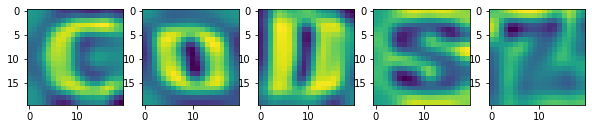

In [108]:
# Visualizing Training data
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 5, 1)
imshow(data[0][0])
fig.add_subplot(1, 5, 2)
imshow(data[1][0])
fig.add_subplot(1, 5, 3)
imshow(data[2][0])
fig.add_subplot(1, 5, 4)
imshow(data[3][0])
fig.add_subplot(1, 5, 5)
imshow(data[4][0])
plt.show()

In [109]:
# Making the model and training it
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=image_size),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(36)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(np.array(train_images), np.array(train_labels), epochs=20, batch_size=20)

Epoch 1/20
171/171 [==============================] - 1s 3ms/step - loss: 3.1511 - accuracy: 0.1921
Epoch 2/20
171/171 [==============================] - 1s 3ms/step - loss: 1.5949 - accuracy: 0.5586
Epoch 3/20
171/171 [==============================] - 1s 4ms/step - loss: 1.0186 - accuracy: 0.7206
Epoch 4/20
171/171 [==============================] - 1s 3ms/step - loss: 0.7179 - accuracy: 0.7961
Epoch 5/20
171/171 [==============================] - 1s 3ms/step - loss: 0.5398 - accuracy: 0.8503
Epoch 6/20
171/171 [==============================] - 1s 3ms/step - loss: 0.4327 - accuracy: 0.8726
Epoch 7/20
171/171 [==============================] - 1s 3ms/step - loss: 0.2989 - accuracy: 0.9141
Epoch 8/20
171/171 [==============================] - 1s 3ms/step - loss: 0.2419 - accuracy: 0.9287
Epoch 9/20
171/171 [==============================] - 1s 3ms/step - loss: 0.1894 - accuracy: 0.9565
Epoch 10/20
171/171 [==============================] - 1s 3ms/step - loss: 0.1933 - accuracy: 0.9438

In [110]:
system("mkdir -p models")
# model.save('./models/my_model_84.h5')

# Predicting on test images
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(np.array(test_images))

p=0
for i in range(len(test_images)):
  if np.argmax(predictions[i]) == test_labels[i]:
    p+=1

print("Test accuracy: ", 100*p/len(test_images))

Test accuracy:  78.94736842105263


In [112]:
fil_dir = "./solving-captchas-code-examples/generated_captcha_images/"
total = 0
char_p = 0
char_n = 0
cap_p = 0
cap_n = 0

for fil in listdir(fil_dir)[:100]:
  image = cv2.imread(fil_dir + fil)
  # imshow(image), plt.show()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

  cnts, new = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] 
  captcha = np.invert(thresh)
  labelled_captcha = measure.label(captcha)

  character_dimensions = (0.25*captcha.shape[0], 0.95*captcha.shape[0], 0.05*captcha.shape[1], 0.3*captcha.shape[1])
  min_height, max_height, min_width, max_width = character_dimensions

  characters = []
  charactersx = []
  counter=0
  column_list = []
  row_list = []
  d = []
  for regions in regionprops(labelled_captcha):
      y0, x0, y1, x1 = regions.bbox
      region_height = y1 - y0
      region_width = x1 - x0

      if region_height > min_height and region_height < max_height and region_width > min_width and region_width < max_width:
          roi = captcha[y0:y1, x0:x1]
          resized_char = cv2.copyMakeBorder(roi, 10, 10, 10, 10, cv2.BORDER_CONSTANT)
          resized_char = resize(roi, image_size)
          column_list.append(x0)
          d.append([x0, resized_char])
  d = sorted(d)
  predicted_captcha = ""  
  ind=0
  for _,each_character in d:
      x_p,y_p = 3,3
      each_character = cv2.copyMakeBorder(each_character, x_p, x_p, y_p, y_p, cv2.BORDER_CONSTANT)
      each_character = cv2.resize(each_character,image_size)
      
      # imshow(each_character), plt.show()
      each_character = each_character.reshape(1, -1)
    
      result, = probability_model.predict([each_character])
      r = np.argmax(result)
      
      if r<10:
        # print(chr(48+r))
        predicted_captcha+=chr(48+r)
        if fil[ind] == chr(48+r):char_p += 1
        else:char_n += 1
      else:
        # print(chr(55+r))
        predicted_captcha+=chr(65-10+r)
        if fil[ind] == chr(65-10+r):char_p += 1
        else:char_n += 1
      ind += 1
  
  if predicted_captcha == fil[:4]: cap_p+=1
  else:cap_n+=1

  # Statistics
  stats = pd.DataFrame(
    [
        [char_p, char_n, 100*char_p/(char_p+char_n)], 
        [cap_p, cap_n, 100*cap_p/(cap_p+cap_n)]
    ], 
    index=["Char", "Captcha"],
    columns=["Pos", "Neg", "Acc"]
  )
  total+=1
  clear_output(wait=True)
  display(HTML(stats.to_html()))
  print("Current file: ", total)
  print(fil[:4], ":", predicted_captcha)

,Pos,Neg,Acc
Char,277,120,69.7733
Captcha,29,71,29.0000


Current file:  100
VZK2 : VZK2
